# Activation Function

A function that receives an input signal and generates an output signal according to a specific condition is called an activation function.

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Linear function

> $f(x) = x$

`Linear` function is used to outputting the input values without converting it, such as regression problem cases.

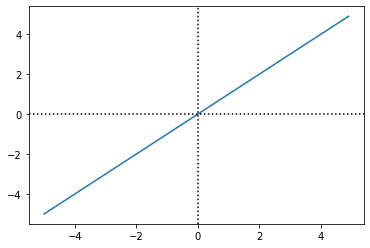

In [4]:
def linear(x):
    return x

xlist = np.arange(-5, 5, 0.1)
y = [linear(x) for x in xlist]
plt.plot(xlist, y)
plt.axhline(y=0, color='k', linestyle='dotted')
plt.axvline(x=0, color='k', linestyle='dotted')
plt.show()

## Sigmoid function

> $f(x) = \frac{1}{1 + e^{-x}}$

`Sigmoid` function is mainly used for two category classification. In addition, the sigmoid function is also called a `logistic` function.

### Cons

* Learning efficiency is poor because the output is always positive for input 0.
* If the input is too large or too small, the slope will vanish.

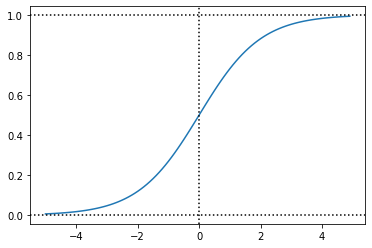

In [5]:
def sigmoid(x):
    return (1 / (1 + math.exp(-x)))

xlist = np.arange(-5, 5, 0.1)
y = [sigmoid(x) for x in xlist]
plt.plot(xlist, y)
plt.axhline(y=0, color='k', linestyle='dotted')
plt.axhline(y=1, color='k', linestyle='dotted')
plt.axvline(x=0, color='k', linestyle='dotted')
plt.show()

## Hyperbolic Tangent function

> $f(x) = tanh(x) = \frac{1 - e^{-x}}{1 + e^{-x}}$

The `tanh` function is a function that the problem of the sigmoid function is improved.

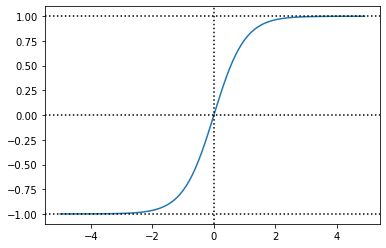

In [6]:
def tanh(x):
    return math.tanh(x)

xlist = np.arange(-5, 5, 0.1)
y = [tanh(x) for x in xlist]
plt.plot(xlist, y)
plt.axhline(y=-1, color='k', linestyle='dotted')
plt.axhline(y=0, color='k', linestyle='dotted')
plt.axhline(y=1, color='k', linestyle='dotted')
plt.axvline(x=0, color='k', linestyle='dotted')
plt.show()

## Rectified Linear Unit function

> $f(x) = max(0, x)$

`ReLU` function is mainly used by CNN.

The calculation of backpropagation is simplified, and the slope vanishing problem can be solved because it is larger than the derivative of the sigmoid function.

### Cons

* The activation of negative values is always zero.
* A loss of zero will never allow the weight of the neuron to be adjusted.
* Neurons sometimes die when learning a network.


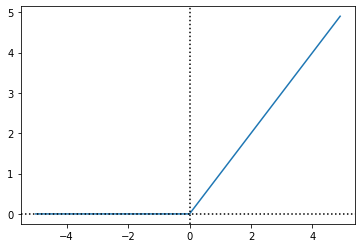

In [7]:
def relu(x):
    return max(0, x)

xlist = np.arange(-5, 5, 0.1)
y = [relu(x) for x in xlist]
plt.plot(xlist, y)
plt.axhline(y=0, color='k', linestyle='dotted')
plt.axvline(x=0, color='k', linestyle='dotted')
plt.show()

## Leaky ReLU / Parametric Leaky ReLU

If the output value of each neuron is greater than 0, it is left as it is, and if it is less than 0, it multiplies the specified number. The default value is 0.01.

> $f(x) = max(a * x, x)$

### Pros

* Even if the input is less than zero, the slope does not vanishing. In other words, even if the input value is less than 0, differentiation is possible.

### Cons

* Like the ReLU function, differentiation is not possible at 0.

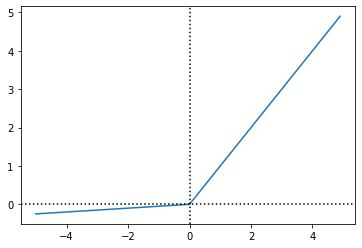

In [8]:
a = 0.05

def leaky_relu(x):
    return max(a * x, x)

xlist = np.arange(-5, 5, 0.1)
y = [leaky_relu(x) for x in xlist]
plt.plot(xlist, y)
plt.axhline(y=0, color='k', linestyle='dotted')
plt.axvline(x=0, color='k', linestyle='dotted')
plt.show()

## Exponential Linear Unit

`ELU` was approximated using the index $e^x$, which lowered the threshold to -1.

> $ f(n) =
\begin{cases}
x & \quad \text{if } x > 0 \\
a * (e^x - 1) & \quad \text{if } x \leq 0
\end{cases}$

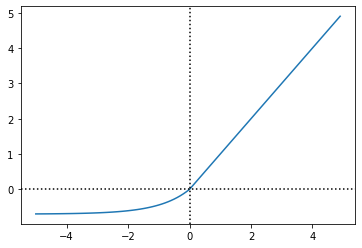

In [9]:
a = 0.7

def elu(x):
    if x > 0:
        return x
    else:
        return a * (math.exp(x) - 1)

xlist = np.arange(-5, 5, 0.1)
y = [elu(x) for x in xlist]
plt.plot(xlist, y)
plt.axhline(y=0, color='k', linestyle='dotted')
plt.axvline(x=0, color='k', linestyle='dotted')
plt.show()

## Softmax function

`Softmax` function is mainly used in multiple category classification.

Output the result so that the total value is 1.

> $f(x_j) = \frac{e^{x_j}}{\displaystyle\sum_{i} e^{x_i}}$

In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

# The softmax function has an overflow issue

def improved_softmax(x): 
    # prevent overflow
    # x => x - np.max(x)
    return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))

a = np.array([0.3, 2.9, 4.0])
print(softmax(a))

b = np.array([1010, 1000, 990])
print(improved_softmax(b))